In [10]:
import pandas as pd
from plotting import CandlePlot
pd.set_option("display.max_columns", None)

In [11]:
df_ma_res = pd.read_pickle("../data/ma_res.pkl")
df_ma_trades = pd.read_pickle("../data/ma_trades.pkl")

In [16]:
df_ma_res.granularity.unique()

array(['H1', 'H4'], dtype=object)

In [17]:
df_ma_res_h1 = df_ma_res[df_ma_res.granularity == "H1"].copy()
df_ma_trades_h1 = df_ma_trades[df_ma_trades.granularity == "H1"].copy()

In [26]:
df_ma_trades_h1.shape

(34016, 32)

In [27]:
df_ma_res_h1.columns

Index(['pair', 'num_trades', 'total_gain', 'mean_gain', 'min_gain', 'max_gain',
       'ma_l', 'ma_s', 'cross', 'granularity'],
      dtype='object')

In [28]:
df_cross_summary = df_ma_res_h1[['pair', 'num_trades', 'total_gain', 'cross']].copy()

In [29]:
df_cross_gr = df_cross_summary.groupby(by="cross", as_index=False).sum()
df_cross_gr.sort_values(by = "total_gain", ascending=False, inplace=True)

In [30]:
df_cross_gr

cross                                               pair  \
3    MA_10_MA_40  EUR_USDEUR_GBPEUR_JPYEUR_AUDEUR_CADUSD_JPYUSD_...   
7    MA_20_MA_40  EUR_USDEUR_GBPEUR_JPYEUR_AUDEUR_CADUSD_JPYUSD_...   
2    MA_10_MA_20  EUR_USDEUR_GBPEUR_JPYEUR_AUDEUR_CADUSD_JPYUSD_...   
11   MA_30_MA_40  EUR_USDEUR_GBPEUR_JPYEUR_AUDEUR_CADUSD_JPYUSD_...   
5   MA_20_MA_120  EUR_USDEUR_GBPEUR_JPYEUR_AUDEUR_CADUSD_JPYUSD_...   
4    MA_10_MA_80  EUR_USDEUR_GBPEUR_JPYEUR_AUDEUR_CADUSD_JPYUSD_...   
6   MA_20_MA_150  EUR_USDEUR_GBPEUR_JPYEUR_AUDEUR_CADUSD_JPYUSD_...   
1   MA_10_MA_150  EUR_USDEUR_GBPEUR_JPYEUR_AUDEUR_CADUSD_JPYUSD_...   
0   MA_10_MA_120  EUR_USDEUR_GBPEUR_JPYEUR_AUDEUR_CADUSD_JPYUSD_...   
8    MA_20_MA_80  EUR_USDEUR_GBPEUR_JPYEUR_AUDEUR_CADUSD_JPYUSD_...   
9   MA_30_MA_120  EUR_USDEUR_GBPEUR_JPYEUR_AUDEUR_CADUSD_JPYUSD_...   
10  MA_30_MA_150  EUR_USDEUR_GBPEUR_JPYEUR_AUDEUR_CADUSD_JPYUSD_...   
12   MA_30_MA_80  EUR_USDEUR_GBPEUR_JPYEUR_AUDEUR_CADUSD_JPYUSD_...   
13  MA_40_MA_120  EUR_USDEUR_GBPEUR_JPYEUR_AUDEUR_CADUSD_JPYUSD_...   
14  MA_40_MA_150  EUR_USDEUR_GBPEUR_JPYEUR_AUDEUR_CADUSD_JPYUSD_...   
15   MA_40_MA_80  EUR_USDEUR_GBPEUR_JPYEUR_AUDEUR_CADUSD_JPYUSD_...   

    num_trades  total_gain  
3         3490        9976  
7         3014        4488  
2         6376        2972  
11        3452         870  
5         1392       -5300  
4         2250       -5304  
6         1212       -6040  
1         1658       -6124  
0         1870       -6176  
8         1814       -6294  
9         1184       -6516  
10        1018       -6764  
12        1654       -7838  
13        1124       -8394  
14         934       -9186  
15        1574       -9540

In [34]:
total_pairs = len(df_ma_res_h1.pair.unique())

In [35]:
total_pairs

15

In [36]:
temp = df_ma_res_h1[df_ma_res_h1.cross == "MA_10_MA_40"]

In [37]:
temp[temp.total_gain > 0].shape[0]

20

In [38]:
for c in df_ma_res_h1.cross.unique():
    temp = df_ma_res_h1[df_ma_res_h1.cross == c]
    pg = temp[temp.total_gain > 0].shape[0]
    print(f"{c} pg:{pg} perc gain:{(pg / total_pairs) * 100:.0f}%")

MA_10_MA_20 pg:18 perc gain:120%
MA_10_MA_40 pg:20 perc gain:133%
MA_20_MA_40 pg:18 perc gain:120%
MA_30_MA_40 pg:16 perc gain:107%
MA_10_MA_80 pg:14 perc gain:93%
MA_20_MA_80 pg:14 perc gain:93%
MA_30_MA_80 pg:12 perc gain:80%
MA_40_MA_80 pg:12 perc gain:80%
MA_10_MA_120 pg:8 perc gain:53%
MA_20_MA_120 pg:12 perc gain:80%
MA_30_MA_120 pg:12 perc gain:80%
MA_40_MA_120 pg:8 perc gain:53%
MA_10_MA_150 pg:12 perc gain:80%
MA_20_MA_150 pg:14 perc gain:93%
MA_30_MA_150 pg:12 perc gain:80%
MA_40_MA_150 pg:6 perc gain:40%


In [42]:
cross = "MA_10_MA_20"
df_MA_10_MA_20 = df_ma_res_h1[df_ma_res_h1.cross == cross].copy()
df_MA_10_MA_20.sort_values(by="total_gain", ascending=False, inplace=True)

In [43]:
df_MA_10_MA_20

pair  num_trades  total_gain  mean_gain  min_gain  max_gain   ma_l  \
128  GBP_JPY         220        1155          5      -264       644  MA_20   
608  GBP_JPY         220        1155          5      -264       644  MA_20   
528  EUR_AUD         193        1022          5       -99       341  MA_20   
48   EUR_AUD         193        1022          5       -99       341  MA_20   
224  CAD_JPY         206         961          4       -93       212  MA_20   
704  CAD_JPY         206         961          4       -93       212  MA_20   
192  AUD_JPY         194         871          4       -98       264  MA_20   
672  AUD_JPY         194         871          4       -98       264  MA_20   
560  USD_JPY         216         568          2      -157       331  MA_20   
80   USD_JPY         216         568          2      -157       331  MA_20   
32   EUR_JPY         206         549          2      -278       376  MA_20   
512  EUR_JPY         206         549          2      -278       376  MA_20   
656  AUD_USD         205         473          2      -102       179  MA_20   
176  AUD_USD         205         473          2      -102       179  MA_20   
624  GBP_AUD         199          58          0      -149       276  MA_20   
144  GBP_AUD         199          58          0      -149       276  MA_20   
208  AUD_CAD         207          33          0       -57       116  MA_20   
688  AUD_CAD         207          33          0       -57       116  MA_20   
576  USD_CAD         217         -33          0       -93       244  MA_20   
96   USD_CAD         217         -33          0       -93       244  MA_20   
16   EUR_GBP         225        -366         -1       -46        84  MA_20   
496  EUR_GBP         225        -366         -1       -46        84  MA_20   
592  GBP_USD         230        -439         -1      -130       250  MA_20   
112  GBP_USD         230        -439         -1      -130       250  MA_20   
0    EUR_USD         220        -738         -3      -100       211  MA_20   
480  EUR_USD         220        -738         -3      -100       211  MA_20   
544  EUR_CAD         216       -1161         -5      -150       377  MA_20   
64   EUR_CAD         216       -1161         -5      -150       377  MA_20   
160  GBP_CAD         234       -1467         -6      -110       251  MA_20   
640  GBP_CAD         234       -1467         -6      -110       251  MA_20   

      ma_s        cross granularity  
128  MA_10  MA_10_MA_20          H1  
608  MA_10  MA_10_MA_20          H1  
528  MA_10  MA_10_MA_20          H1  
48   MA_10  MA_10_MA_20          H1  
224  MA_10  MA_10_MA_20          H1  
704  MA_10  MA_10_MA_20          H1  
192  MA_10  MA_10_MA_20          H1  
672  MA_10  MA_10_MA_20          H1  
560  MA_10  MA_10_MA_20          H1  
80   MA_10  MA_10_MA_20          H1  
32   MA_10  MA_10_MA_20          H1  
512  MA_10  MA_10_MA_20          H1  
656  MA_10  MA_10_MA_20          H1  
176  MA_10  MA_10_MA_20          H1  
624  MA_10  MA_10_MA_20          H1  
144  MA_10  MA_10_MA_20          H1  
208  MA_10  MA_10_MA_20          H1  
688  MA_10  MA_10_MA_20          H1  
576  MA_10  MA_10_MA_20          H1  
96   MA_10  MA_10_MA_20          H1  
16   MA_10  MA_10_MA_20          H1  
496  MA_10  MA_10_MA_20          H1  
592  MA_10  MA_10_MA_20          H1  
112  MA_10  MA_10_MA_20          H1  
0    MA_10  MA_10_MA_20          H1  
480  MA_10  MA_10_MA_20          H1  
544  MA_10  MA_10_MA_20          H1  
64   MA_10  MA_10_MA_20          H1  
160  MA_10  MA_10_MA_20          H1  
640  MA_10  MA_10_MA_20          H1

In [44]:
df_gains = df_ma_trades_h1[(df_ma_trades_h1.cross==cross)&
                           (df_ma_trades_h1.pair=="CAD_JPY")].copy()

In [46]:
df_gains.head(3)

time  volume    mid_o    mid_h    mid_l    mid_c  \
15902 2023-05-04 21:00:00+00:00     455   99.172   99.184   99.119   99.154   
15903 2023-05-08 22:00:00+00:00    3980  101.008  101.056  100.957  100.971   
15904 2023-05-09 20:00:00+00:00    2564  101.034  101.068  101.012  101.046   

         bid_o    bid_h    bid_l    bid_c    ask_o    ask_h    ask_l    ask_c  \
15902   99.123   99.146   99.067   99.116   99.221   99.269   99.163   99.192   
15903  100.968  101.039  100.945  100.956  101.048  101.104  100.969  100.986   
15904  101.026  101.057  101.000  101.026  101.042  101.078  101.023  101.065   

            MA_40     MA_10       MA_80      MA_20      MA_150      MA_120  \
15902   99.107175   98.9457  100.008488   98.92900   99.671627  100.040192   
15903  100.691750  101.0069   99.868175  101.03660  100.252760  100.065075   
15904  100.987025  100.9347  100.391937  100.91225  100.268367  100.047175   

            MA_30    DELTA  DELTA_PREV  TRADE   DIFF   GAIN granularity  \
15902   98.980033  0.01670    -0.00760      1  1.817  181.7          H1   
15903  100.965833 -0.02970     0.01710     -1  0.075   -7.5          H1   
15904  100.941300  0.02245    -0.01275      1  0.048    4.8          H1   

          pair  GAIN_C   ma_l   ma_s        cross  
15902  CAD_JPY   181.7  MA_20  MA_10  MA_10_MA_20  
15903  CAD_JPY   174.2  MA_20  MA_10  MA_10_MA_20  
15904  CAD_JPY   179.0  MA_20  MA_10  MA_10_MA_20

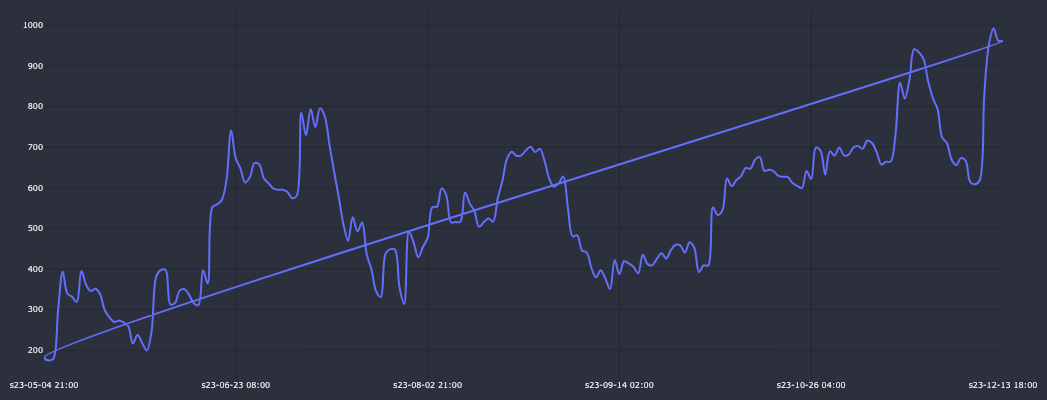

In [47]:
cp = CandlePlot(df_gains, candles=False)
cp.show_plot(line_traces=['GAIN_C'])

GBP_JPY 2311


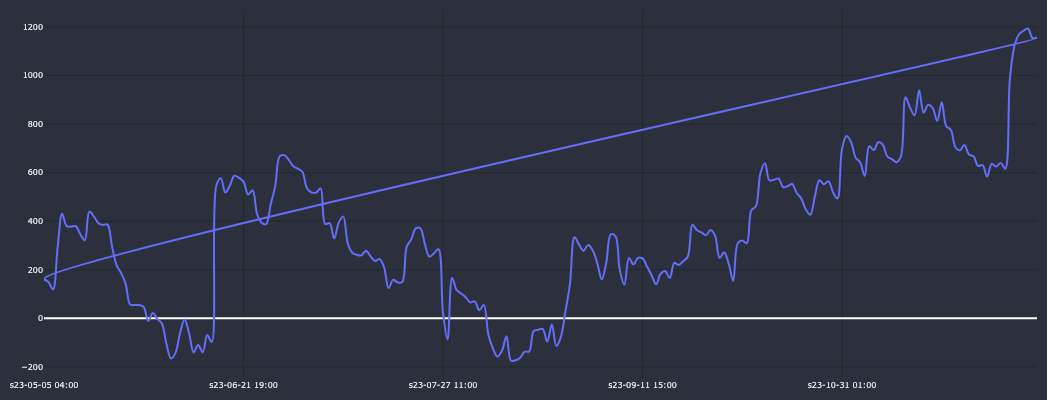

EUR_AUD 2044


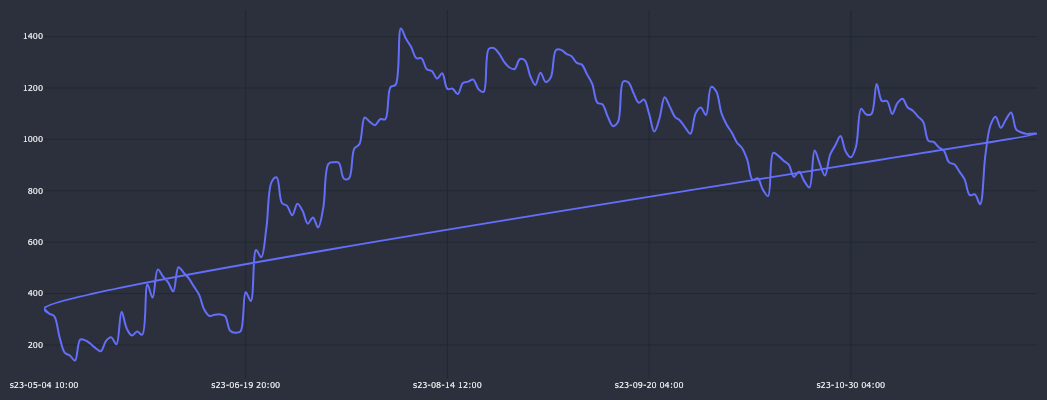

CAD_JPY 1923


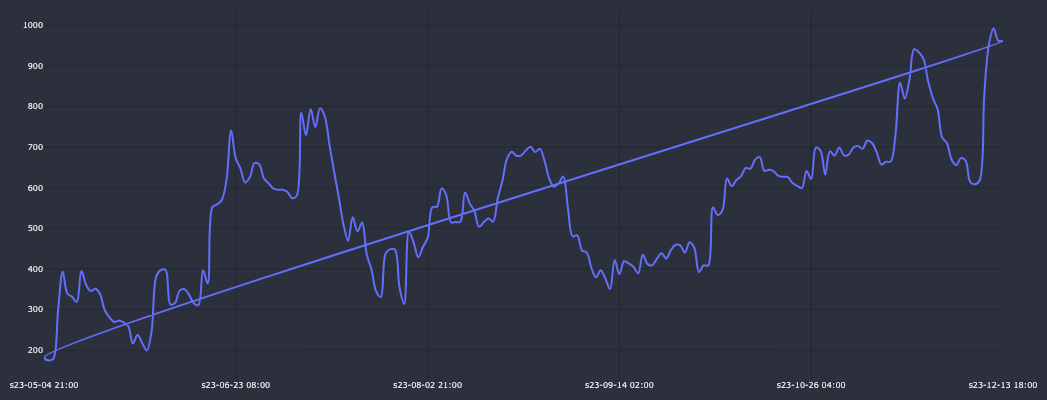

AUD_JPY 1742


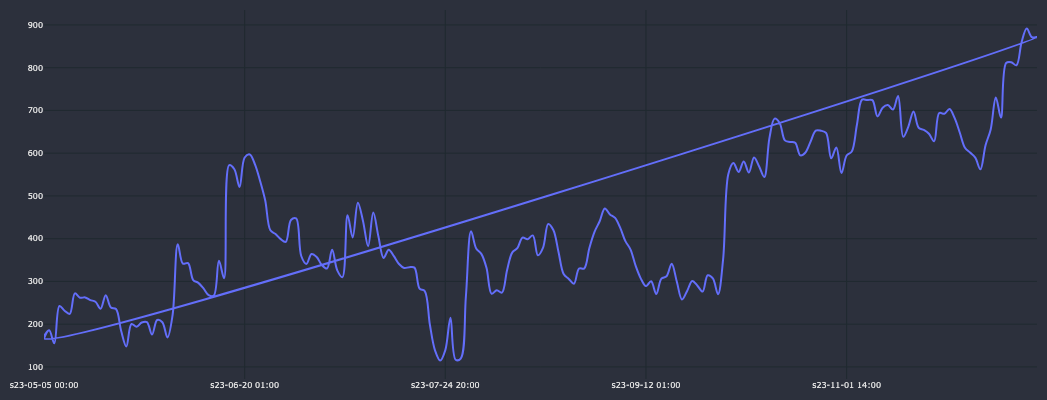

USD_JPY 1136


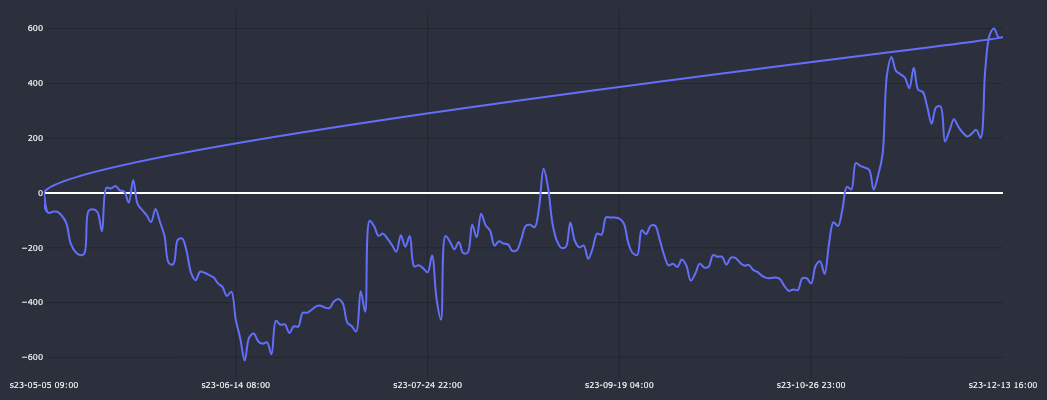

EUR_JPY 1098


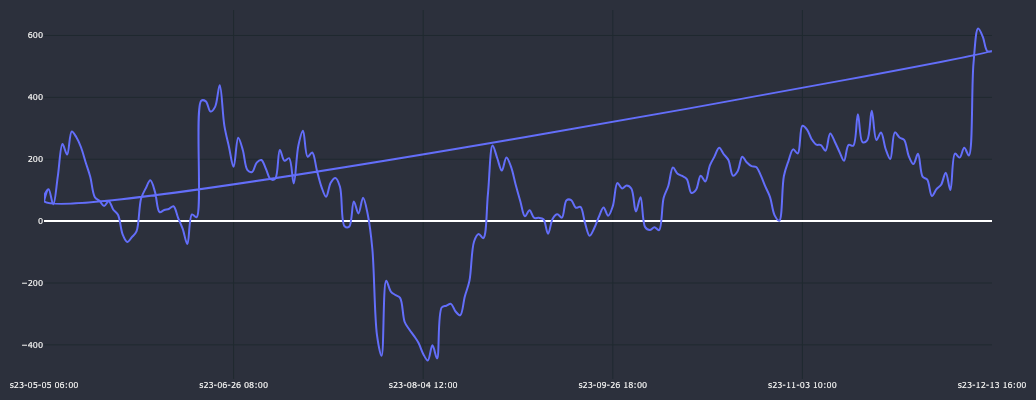

AUD_USD 946


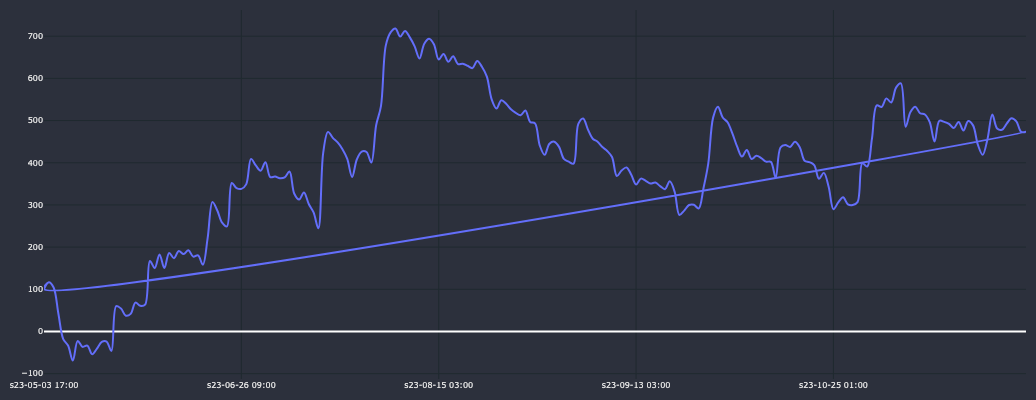

GBP_AUD 116


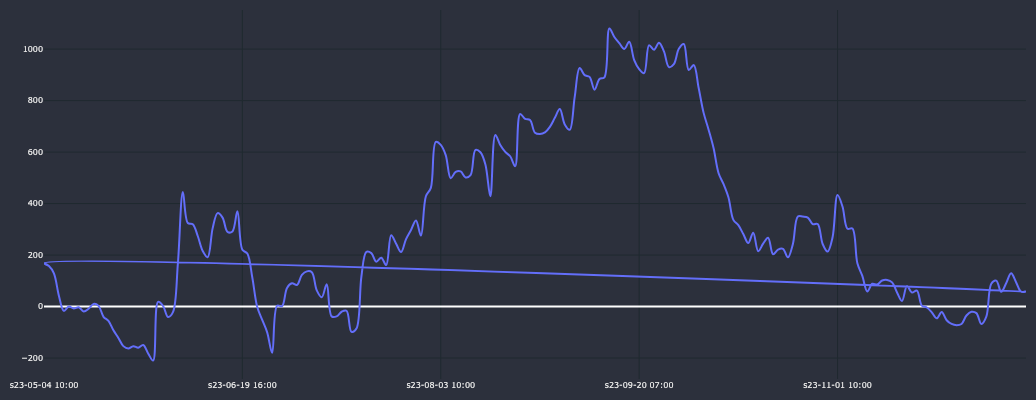

AUD_CAD 67


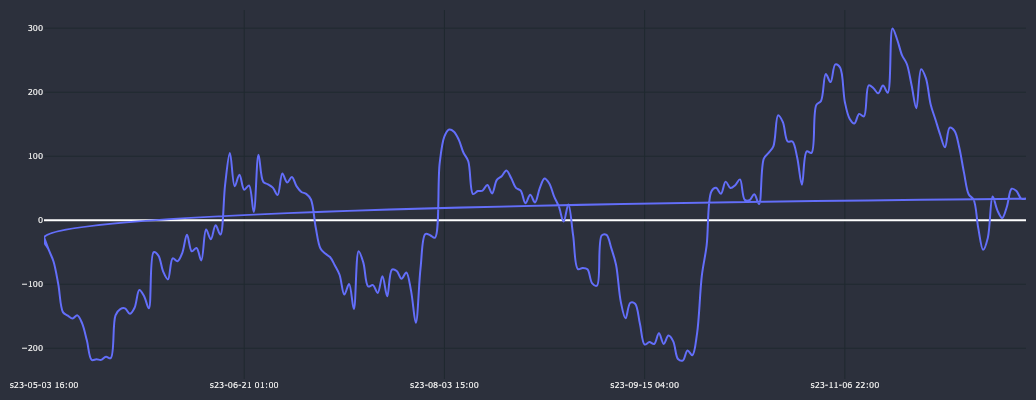

In [50]:
for curr in df_MA_10_MA_20[df_MA_10_MA_20.total_gain > 0].pair.unique():
    temp_gains = df_ma_trades_h1[(df_ma_trades_h1.cross==cross)&
                           (df_ma_trades_h1.pair==curr)].copy()
    print(curr, int(temp_gains.GAIN.sum()))
    cp = CandlePlot(temp_gains, candles=False)
    cp.show_plot(line_traces=['GAIN_C'])